## <center><u> Correction Intensité</u></center>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import glob
import os
#import SwingTools as st
import swing_toolsv4ssCorrT as st
import VideoSwingTools as vst
from IPython.display import clear_output

## 1 - Correction de transmission

- Echantillon de mesures (SF venant de different Kin)

In [15]:
data_folder = 'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/'
maskfile = 'macro_mask/mask_waxs_eiger_ruiz_oct24.edf'

files_samples = [ data_folder+'rodriguez_01089_2024-10-11_04-33-50.h5',#kin6,
                  data_folder+'rodriguez_02399_2024-10-11_17-10-50.h5',#kin11,
                  data_folder+'rodriguez_05068_2024-10-12_12-17-56.h5',#kin21,
                  data_folder+'rodriguez_05732_2024-10-12_16-28-00.h5',#kin23,
                  data_folder+'rodriguez_09573_2024-10-13_18-07-02.h5',#kin37,
                  data_folder+'rodriguez_10743_2024-10-14_04-01-45.h5',#kin11]
               ]

files_ref = [     data_folder+'refs/rodriguez_00908_2024-10-11_03-36-51.h5',#kin6
                  data_folder+'refs/rodriguez_02251_2024-10-11_16-37-25.h5',#kin11
                  data_folder+'refs/rodriguez_04858_2024-10-12_11-27-00.h5',#kin21
                  data_folder+'refs/rodriguez_05565_2024-10-12_15-45-32.h5',#kin23
                  data_folder+'refs/rodriguez_09373_2024-10-13_17-22-04.h5',#kin37
                  data_folder+'refs/rodriguez_10483_2024-10-14_02-58-04.h5',#kin11
            ]

foxtrot_samples_true = [     data_folder+'foxtrotNormaliseTrue/01089.txt', #kin6
                        data_folder+'foxtrotNormaliseTrue/02399.txt',#kin11
                        data_folder+'foxtrotNormaliseTrue/05068.txt',#kin21
                        data_folder+'foxtrotNormaliseTrue/05732.txt',#kin23
                        data_folder+'foxtrotNormaliseTrue/09573.txt',#kin37
                        data_folder+'foxtrotNormaliseTrue/10743.txt',#ki44
                  ]
# foxtrot_samples_false = [     data_folder+'foxtrotNormaliseFalse/01089.txt', #kin6
#                         data_folder+'foxtrotNormalizeFalse/02399.txt',#kin11
#                         data_folder+'foxtrotNormalizeFalse/05068.txt',#kin21
#                         data_folder+'foxtrotNormaliseFalse/05732.txt',#kin23
#                         data_folder+'foxtrotNormaliseFalse/09573.txt',#kin37
#                         data_folder+'foxtrotNormaliseFalse/10743.txt',#ki44
#                   ]

foxtrot_samples_false = [     'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/foxtrotNormalizeFalse/01089.txt', #kin6
                        'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/foxtrotNormalizeFalse/02399.txt',#kin11
                        'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/foxtrotNormalizeFalse/05068.txt',#kin21
                        'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/foxtrotNormalizeFalse/05732.txt',#kin23
                        'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/foxtrotNormalizeFalse/09573.txt',#kin37
                        'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/foxtrotNormalizeFalse/10743.txt',#ki44
                  ]

foxtrot_refs_true = [data_folder+'foxtrotNormaliseTrue/refs/00908.txt',###############FAIRE LES AUTRES
                     data_folder+'foxtrotNormaliseTrue/refs/00908.txt',
                     data_folder+'foxtrotNormaliseTrue/refs/00908.txt',
                     data_folder+'foxtrotNormaliseTrue/refs/00908.txt',
                     data_folder+'foxtrotNormaliseTrue/refs/00908.txt',
                     data_folder+'foxtrotNormaliseTrue/refs/00908.txt']

foxtrot_refs_false = ['C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/foxtrotNormalizeFalse/refs/00908.txt',###############FAIRE LES AUTRES
                      'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/foxtrotNormalizeFalse/refs/00908.txt',
                      'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/foxtrotNormalizeFalse/refs/00908.txt',
                      'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/foxtrotNormalizeFalse/refs/00908.txt',
                      'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/foxtrotNormalizeFalse/refs/00908.txt',
                      'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/foxtrotNormalizeFalse/refs/00908.txt',
                      ]


kin =['kin6',
      'kin11',
      'kin21',
      'kin23',
      'kin37',
      'kin44',
      ]

In [3]:
print(f"{'Sample Name':<30} {'Transmission Mean':<20} {'Average MI8B Mean':<20} {'Exposure Time':<15}")
for file in files_samples:
    params = st.extract_from_h5(file)
    
    # Extracting the values
    sample_name = params["Sample_Name"]
    transmission = np.mean(params["transmission"])
    averagemi8b = np.mean(params["averagemi8b"])
    exposure_time = params["exposure_time"]
    
    print(f"{sample_name:<30} {transmission:<20.4f} {averagemi8b:<20.4e} {exposure_time:<15}")


print('---------------------')
print(f"{'Sample Name':<30} {'Transmission Mean':<20} {'Average MI8B Mean':<20} {'Exposure Time':<15}")
for file in files_ref:
    params = st.extract_from_h5(file)
    
    # Extracting the values
    sample_name = params["Sample_Name"]
    transmission = np.mean(params["transmission"])
    averagemi8b = np.mean(params["averagemi8b"])
    exposure_time = params["exposure_time"]
    
    print(f"{sample_name:<30} {transmission:<20.4f} {averagemi8b:<20.4e} {exposure_time:<15}")

Sample Name                    Transmission Mean    Average MI8B Mean    Exposure Time  
S_C_2_SF_7_P_20                0.5447               5.6427e-08           200.0          
S_C_2_SF_2_P_31                0.5864               5.9949e-08           250.0          
S_C_2_SF_4_P_1                 0.6177               5.0949e-08           250.0          
S_C_2_SF_3_P_37                0.6473               5.2917e-08           250.0          
S_C_2_SF_3_P_48                0.6318               4.8631e-08           250.0          
S_C_2_SF_16_P_10               0.6322               4.8057e-08           500.0          
---------------------
Sample Name                    Transmission Mean    Average MI8B Mean    Exposure Time  
R_C_2_P_20                     0.7104               7.3481e-08           200.0          
R_C_2_P_31                     0.7678               7.6745e-08           250.0          
R_C_2_P_1                      0.7680               6.3646e-08           250.0          

- Tracé des differents samples:
    - Non corrigés
    - Corrigés par la formule $ i_{\text{corr}} = \frac{i}{\text{averagemi8b} \times \text{exposure\_time} \times 30700} $
    - Corrigés par la formule $ i_{\text{corr}} = \frac{i}{\text{transmission}} $
    - Foxtrot avec macro Normalize True
    - Foxtrot avec macro Normalize False


ratio= 1.003, sigma= 0.016
ratio= 1.001, sigma= 0.014
ratio= 1.002, sigma= 0.015
ratio= 1.002, sigma= 0.015
ratio= 1.002, sigma= 0.015
ratio= 1.001, sigma= 0.012


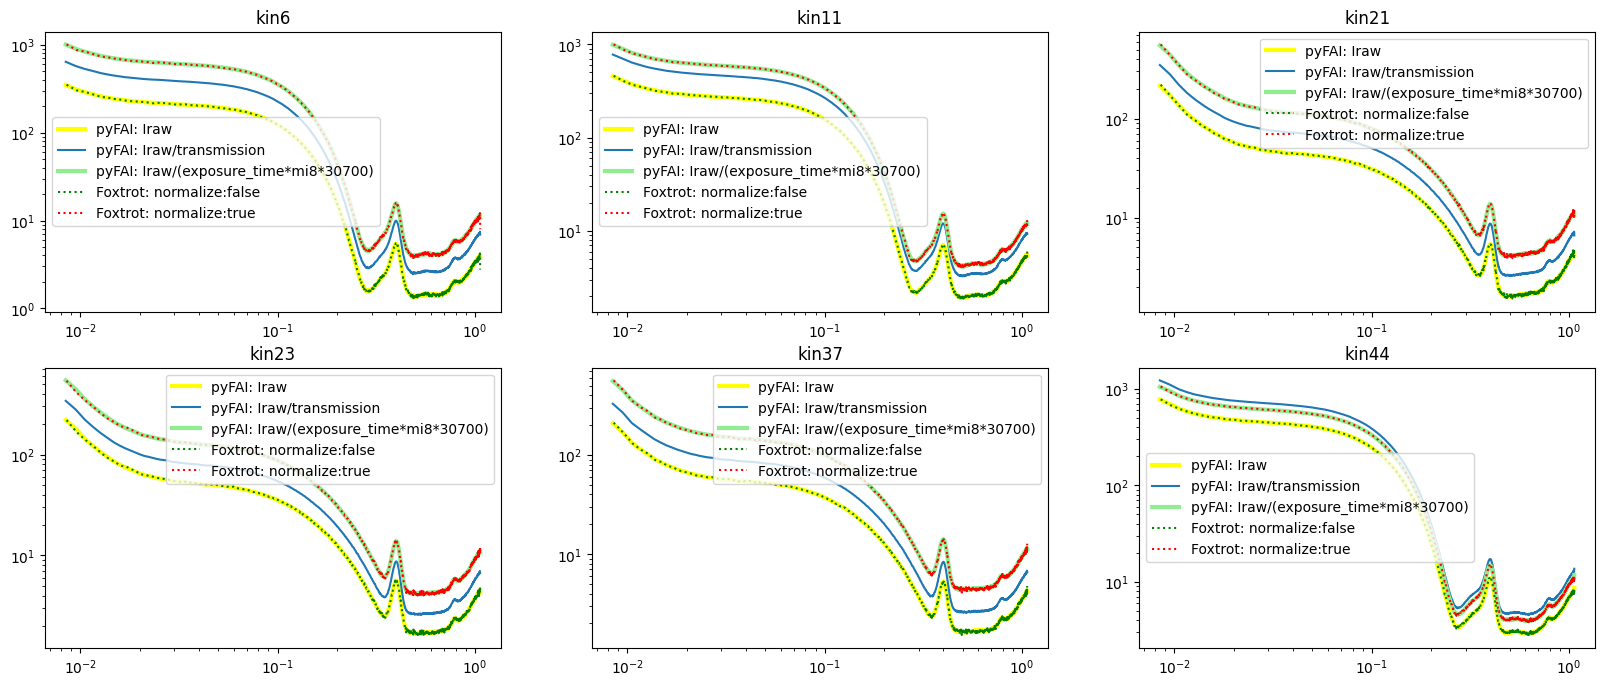

In [ ]:
#SAMPLES
fig,ax = plt.subplots(2,3,figsize=(20,8))
for index in range(len(files_samples)):
    row = index // 3 
    col = index % 3
    
    params_S = st.extract_from_h5(files_samples[index])
    q, i = st.integrate(params_S, maskfile, mean=True)
    ax[row, col].loglog(q,i,label = 'pyFAI: Iraw',color = 'yellow',linewidth=3)


    sample_name = params_S["Sample_Name"]
    transmission = np.mean(params_S["transmission"])
    averagemi8b = np.mean(params_S["averagemi8b"])
    exposure_time = params_S["exposure_time"]

    ax[row, col].loglog(q,i/transmission,label = 'pyFAI: Iraw/transmission') 
    ax[row, col].loglog(q,i/(exposure_time*averagemi8b*30700),label = 'pyFAI: Iraw/(exposure_time*mi8*30700)',color = 'lightgreen',linewidth=3) 

    

    q_foxtrot,i_foxtrot = st.load_txt(foxtrot_samples_false[index], skiprows=1)
    ax[row, col].loglog(q_foxtrot,i_foxtrot,label = 'Foxtrot: normalize:false',linestyle = ':',color = 'green')

    q_foxtrot,i_foxtrot = st.load_txt(foxtrot_samples_true[index], skiprows=1)
    ax[row, col].loglog(q_foxtrot,i_foxtrot,label = 'Foxtrot: normalize:true',linestyle = ':',color = 'red')


    ax[row, col].set_title(kin[index])
    ax[row, col].legend()

    mean_ratio, sigma_ratio = st.ratio(q_foxtrot,i_foxtrot,q,i/(exposure_time*averagemi8b*30700))

ratio= 2.213, sigma= 0.040
ratio= 2.395, sigma= 0.083
ratio= 2.066, sigma= 0.070
ratio= 2.071, sigma= 0.077
ratio= 2.079, sigma= 0.061
ratio= 2.240, sigma= 0.053


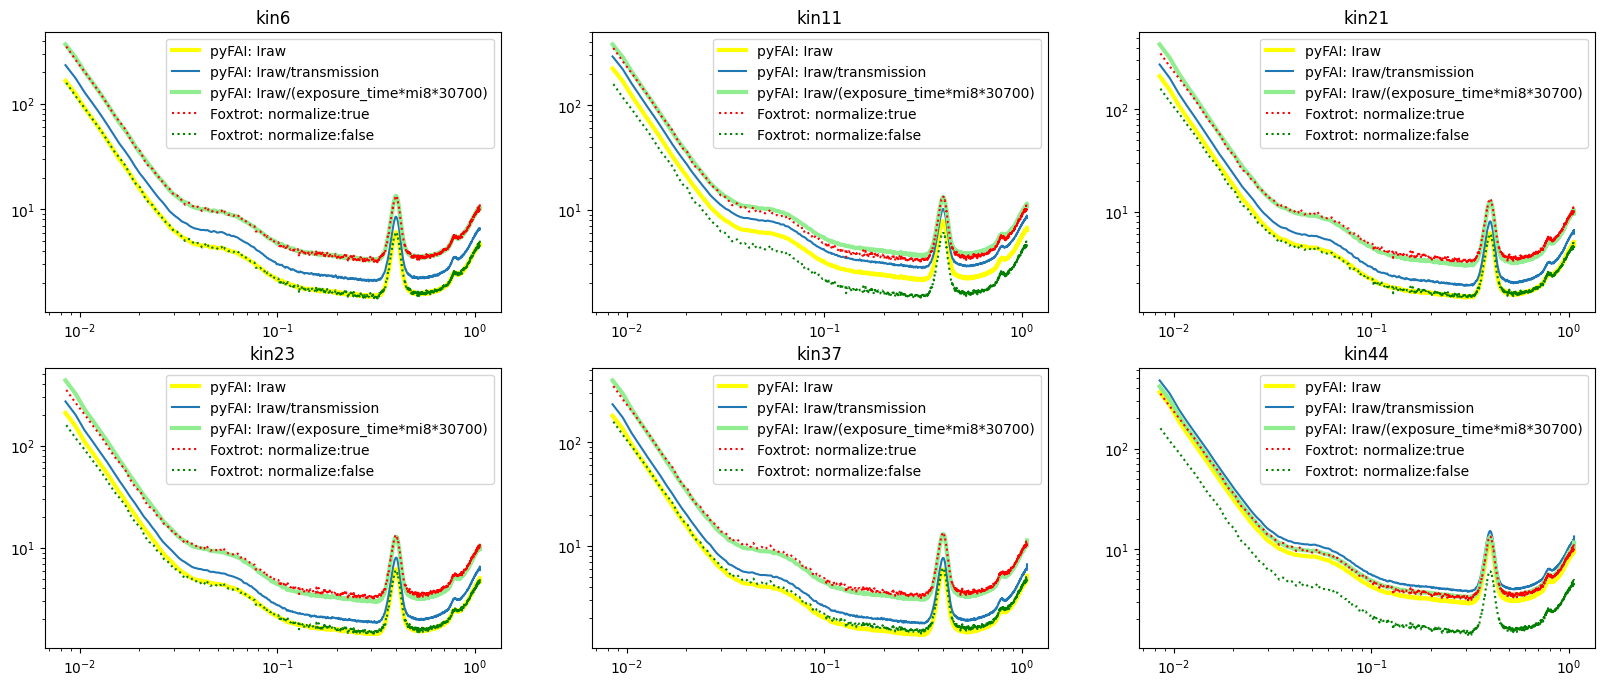

In [ ]:
#REFERENCES HEXANE
fig,ax = plt.subplots(2,3,figsize=(20,8))
for index in range(len(files_ref)):
    row = index // 3 
    col = index % 3
    
    params_R = st.extract_from_h5(files_ref[index])
    q, i = st.integrate(params_R, maskfile, mean=True)
    ax[row, col].loglog(q,i,label = 'pyFAI: Iraw',color = 'yellow',linewidth=3)


    sample_name = params_R["Sample_Name"]
    transmission = np.mean(params_R["transmission"])
    averagemi8b = np.mean(params_R["averagemi8b"])
    exposure_time = params_R["exposure_time"]

    ax[row, col].loglog(q,i/transmission,label = 'pyFAI: Iraw/transmission') 
    ax[row, col].loglog(q,i/(exposure_time*averagemi8b*30700),label = 'pyFAI: Iraw/(exposure_time*mi8*30700)',color = 'lightgreen',linewidth=3) 

    q_foxtrot,i_foxtrot = st.load_txt(foxtrot_refs_true[index], skiprows=1)
    ax[row, col].loglog(q_foxtrot,i_foxtrot,label = 'Foxtrot: normalize:true',linestyle = ':',color = 'red')

    q_foxtrot,i_foxtrot = st.load_txt(foxtrot_refs_false[index], skiprows=1)
    ax[row, col].loglog(q_foxtrot,i_foxtrot,label = 'Foxtrot: normalize:false',linestyle = ':',color = 'green')


    ax[row, col].set_title(kin[index])
    ax[row, col].legend()

    mean_ratio, sigma_ratio = st.ratio(q_foxtrot,i_foxtrot,q,i/(exposure_time*averagemi8b*30700))

La bonne correction est donc: $ i_{\text{corr}} = \frac{i}{\text{averagemi8b} \times \text{exposure\_time} \times 30700} $

-soustraction des fichiers foxtrat sample et ref

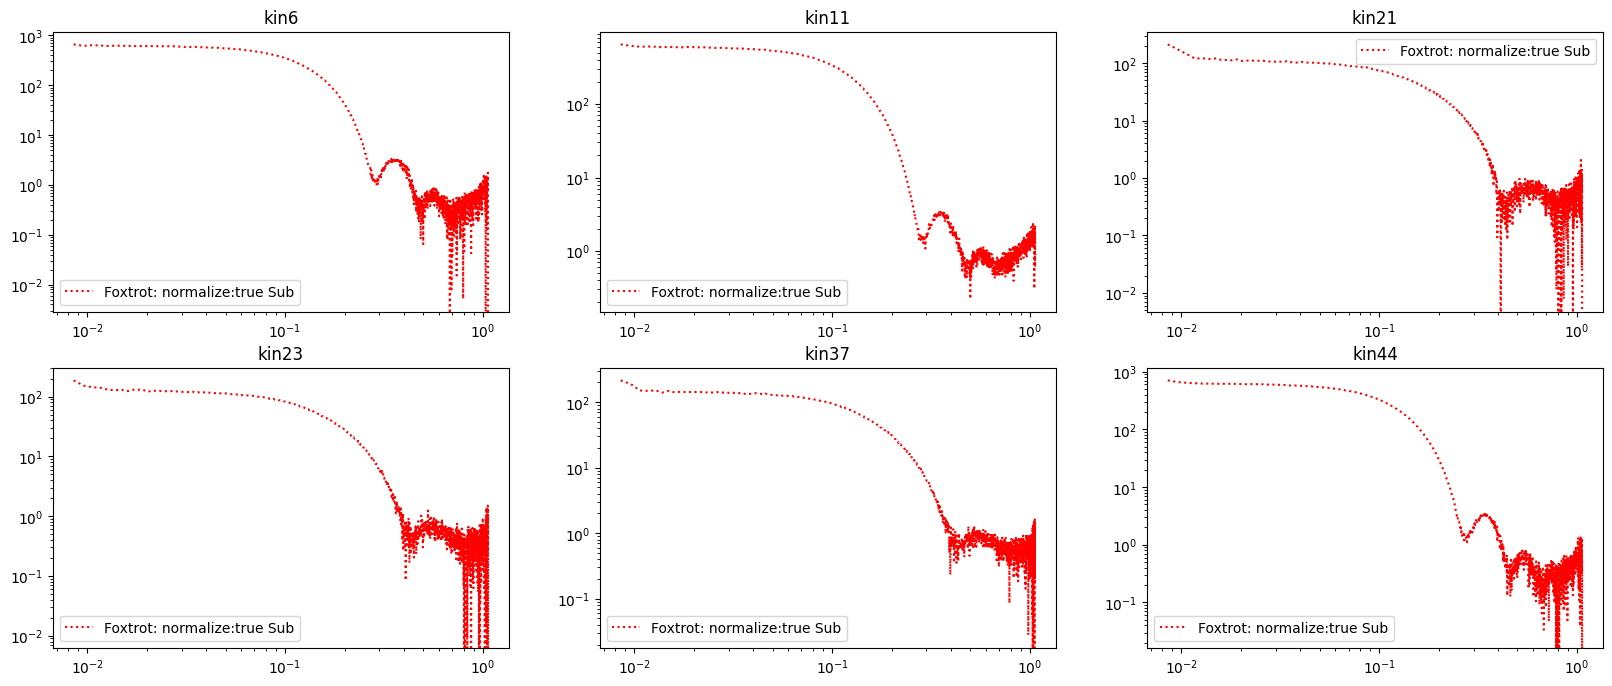

In [20]:
fig,ax = plt.subplots(2,3,figsize=(20,8))
for index in range(len(files_ref)):
    row = index // 3 
    col = index % 3
    q_foxtrot_R,i_foxtrot_R = st.load_txt(foxtrot_refs_true[index], skiprows=1)

    q_foxtrot_S,i_foxtrot_S = st.load_txt(foxtrot_samples_true[index], skiprows=1)

    i_foxtrot_corr = i_foxtrot_S - i_foxtrot_R

    ax[row, col].loglog(q_foxtrot,i_foxtrot_corr,label = 'Foxtrot: normalize:true Sub',linestyle = ':',color = 'red')


    ax[row, col].set_title(kin[index])
    ax[row, col].legend()

- Soustraction des courbes corrigées

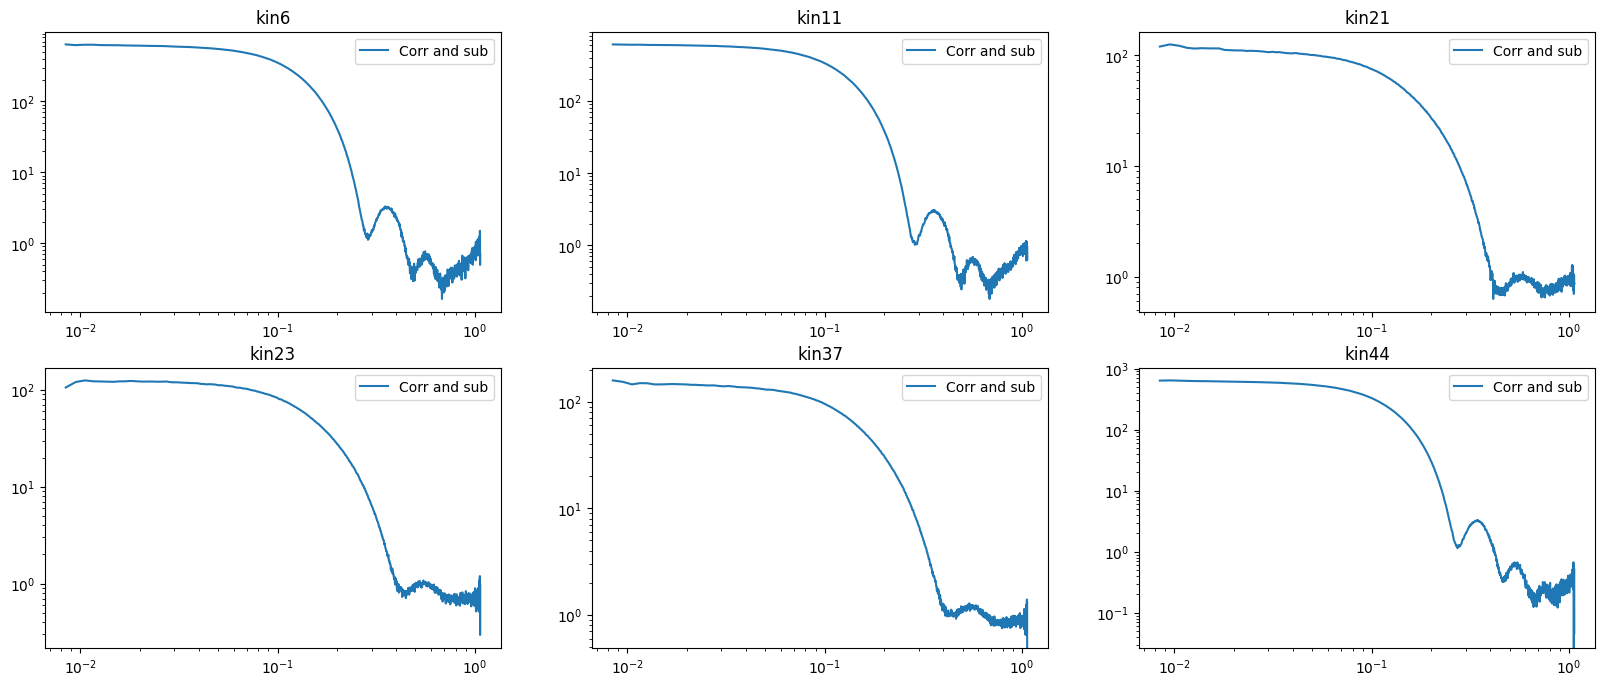

In [22]:
fig,ax = plt.subplots(2,3,figsize=(20,8))
for index in range(len(files_samples)):
    row = index // 3 
    col = index % 3
    
    params_S = st.extract_from_h5(files_samples[index])
    q_S, i_S = st.integrate(params_S, maskfile, mean=True)
    averagemi8b_S = np.mean(params_S["averagemi8b"])
    exposure_time_S = params_S["exposure_time"]
    transmission_S = np.mean(params_S["transmission"])
    i_S_cor = i_S/(exposure_time_S*averagemi8b_S*30700)
   


    params_R = st.extract_from_h5(files_ref[index])
    q_R, i_R = st.integrate(params_R, maskfile, mean=True)
    averagemi8b_R = np.mean(params_R["averagemi8b"])
    exposure_time_R = params_R["exposure_time"]
    transmission_R = np.mean(params_R["transmission"])
    i_R_cor = i_R/(exposure_time_R*averagemi8b_R*30700)
   



   # I_sub = (i_S_cor/transmission_S) - (i_R_cor/transmission_R)#??????????????????
    I_sub = i_S_cor - i_R_cor#??????????????????
    

    #ax[row, col].loglog(q,I_sub,label = 'Corr and sub') 
    ax[row, col].loglog(q,I_sub,label = 'Corr and sub') 
     
    ax[row, col].set_title(kin[index])
    ax[row, col].legend()

    

- Verif sur kin23 (validé Guillaume)

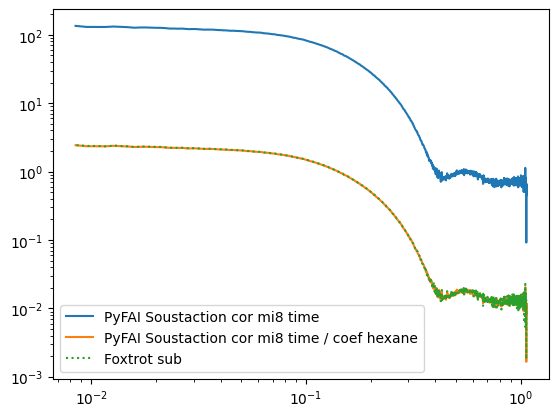

In [ ]:
sample_folder = 'D:/SWING/to_do/kin_23_au_125tes_rt/'
sample_file = 'rodriguez_05734_2024-10-12_16-28-20.h5'
ref_file ='rodriguez_05563_2024-10-12_15-45-12.h5'

coef =0.018
        
file_path =  os.path.join(sample_folder,sample_file)
params = st.extract_from_h5(file_path, False)
q, i = st.integrate(params,maskfile,mean=True)
mi8 = np.mean(params['averagemi8b'])
exp_time = params['exposure_time']
i_corr = i/(mi8*exp_time*30700)
#transmission = np.mean(params['transmission'])
#i_corr = i/transmission


file_path =  os.path.join(sample_folder,ref_file)
params = st.extract_from_h5(file_path, False)
q, i = st.integrate(params,maskfile,mean=True)
mi8 = np.mean(params['averagemi8b'])
exp_time = params['exposure_time']
i_corr_ref = i/(mi8*exp_time*30700)
#transmission = np.mean(params['transmission'])
#i_corr_ref = i/transmission

i_sub = i_corr - i_corr_ref

foxtrot_path = 'fin_cinetique/S_C_2_SF_3_P_35_05734{0,0}_AzInt_Px_427.dat'
foxtrot_sub = st.load_txt(foxtrot_path,21)

fig,ax = plt.subplots()
# ax.loglog(q, i,label = 'PyFAI sample raw')
# ax.loglog(q, i_corr,label = 'PyFAI sample cor mi8 time')
# ax.loglog(q, i_corr_ref,label = 'PyFAI ref cor mi8 time')
ax.loglog(q, i_sub, label = 'PyFAI Soustaction cor mi8 time')
ax.loglog(q, i_sub*coef, label = 'PyFAI Soustaction cor mi8 time / coef hexane')
ax.loglog(foxtrot_sub[0],foxtrot_sub[1], label = 'Foxtrot sub',linestyle = ':')

ax.legend()